<a href="https://colab.research.google.com/github/vamsipapagatla/Scikit-Learn/blob/main/ScikitLearn_California_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import essential libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [3]:
# Import the dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [4]:
# Load the California housing data
housing = fetch_california_housing(as_frame=True)

In [5]:
# Convert to DataFrame
data = housing.frame

In [6]:
# Display the first few rows
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [8]:
X = data.drop(columns=['MedHouseVal'])
y = data['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of the datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (16512, 8)
Testing data shape: (4128, 8)


In [9]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Print the model's coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Model Intercept: -37.02327770606409


In [11]:
# Use the trained model to predict house values for the test set
y_pred = model.predict(X_test)

# Display the first 5 predicted values
print("Predicted Values (y_pred):", y_pred[:5])

# Display the first 5 actual values (from y_test)
print("Actual Values (y_test):", y_test[:5].values)


Predicted Values (y_pred): [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]
Actual Values (y_test): [0.477   0.458   5.00001 2.186   2.78   ]


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


Mean Squared Error (MSE): 0.5558915986952444
R² Score: 0.5757877060324508


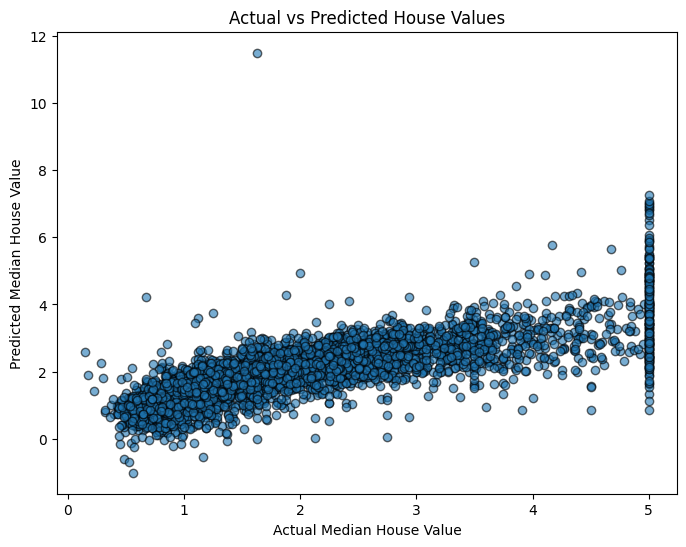

In [22]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Values")
plt.savefig("actual_vs_predicted_plot.png")
plt.show()


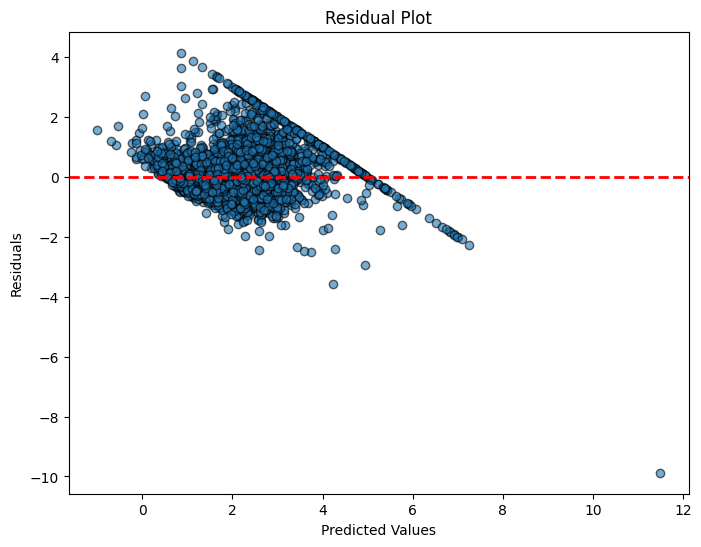

In [23]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.savefig("residual_plot.png")
plt.show()


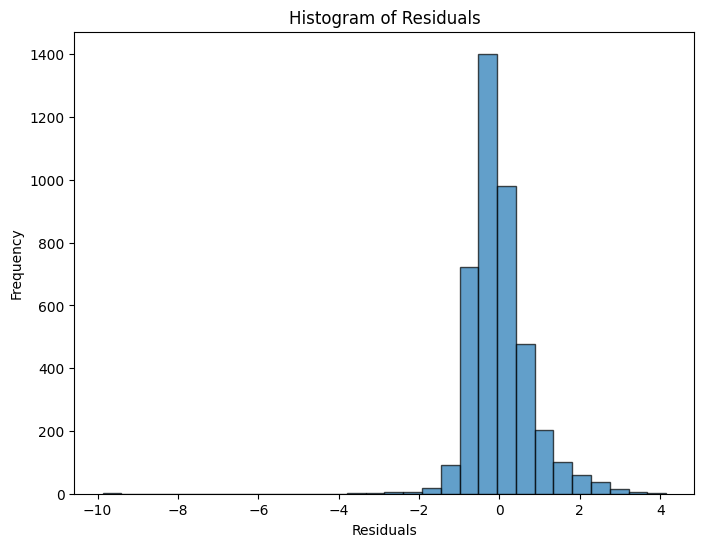

In [25]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.savefig("residual_histogram.png")
plt.show()


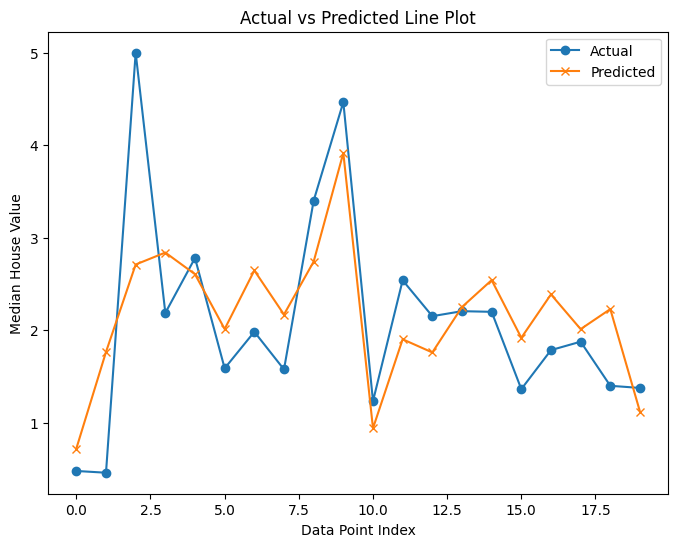

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test[:20])), y_test[:20], label="Actual", marker='o')
plt.plot(range(len(y_pred[:20])), y_pred[:20], label="Predicted", marker='x')
plt.xlabel("Data Point Index")
plt.ylabel("Median House Value")
plt.title("Actual vs Predicted Line Plot")
plt.legend()
plt.show()

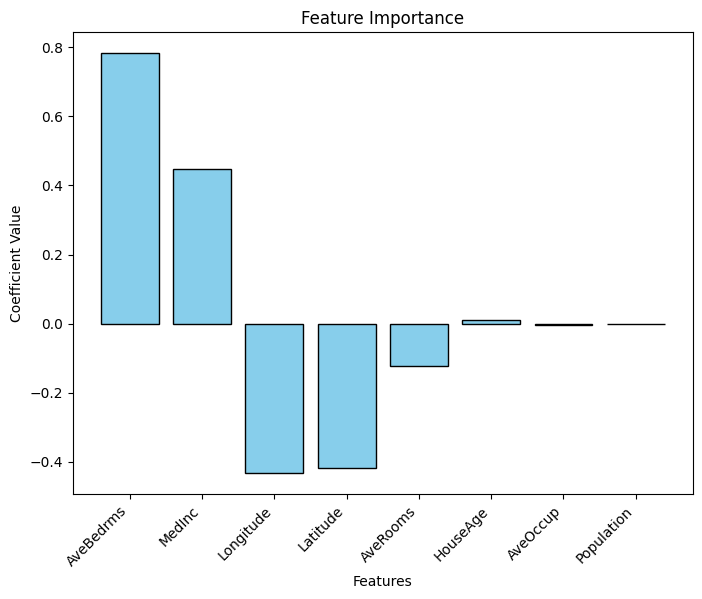

In [26]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue', edgecolor='k')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance")
plt.savefig("feature_importance_plot.png")
plt.show()

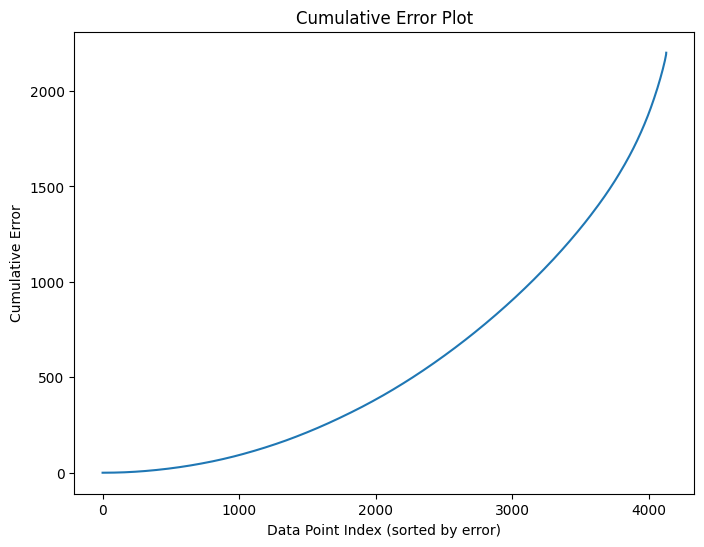

In [18]:
sorted_errors = np.sort(abs(residuals))

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(sorted_errors))
plt.xlabel("Data Point Index (sorted by error)")
plt.ylabel("Cumulative Error")
plt.title("Cumulative Error Plot")
plt.show()


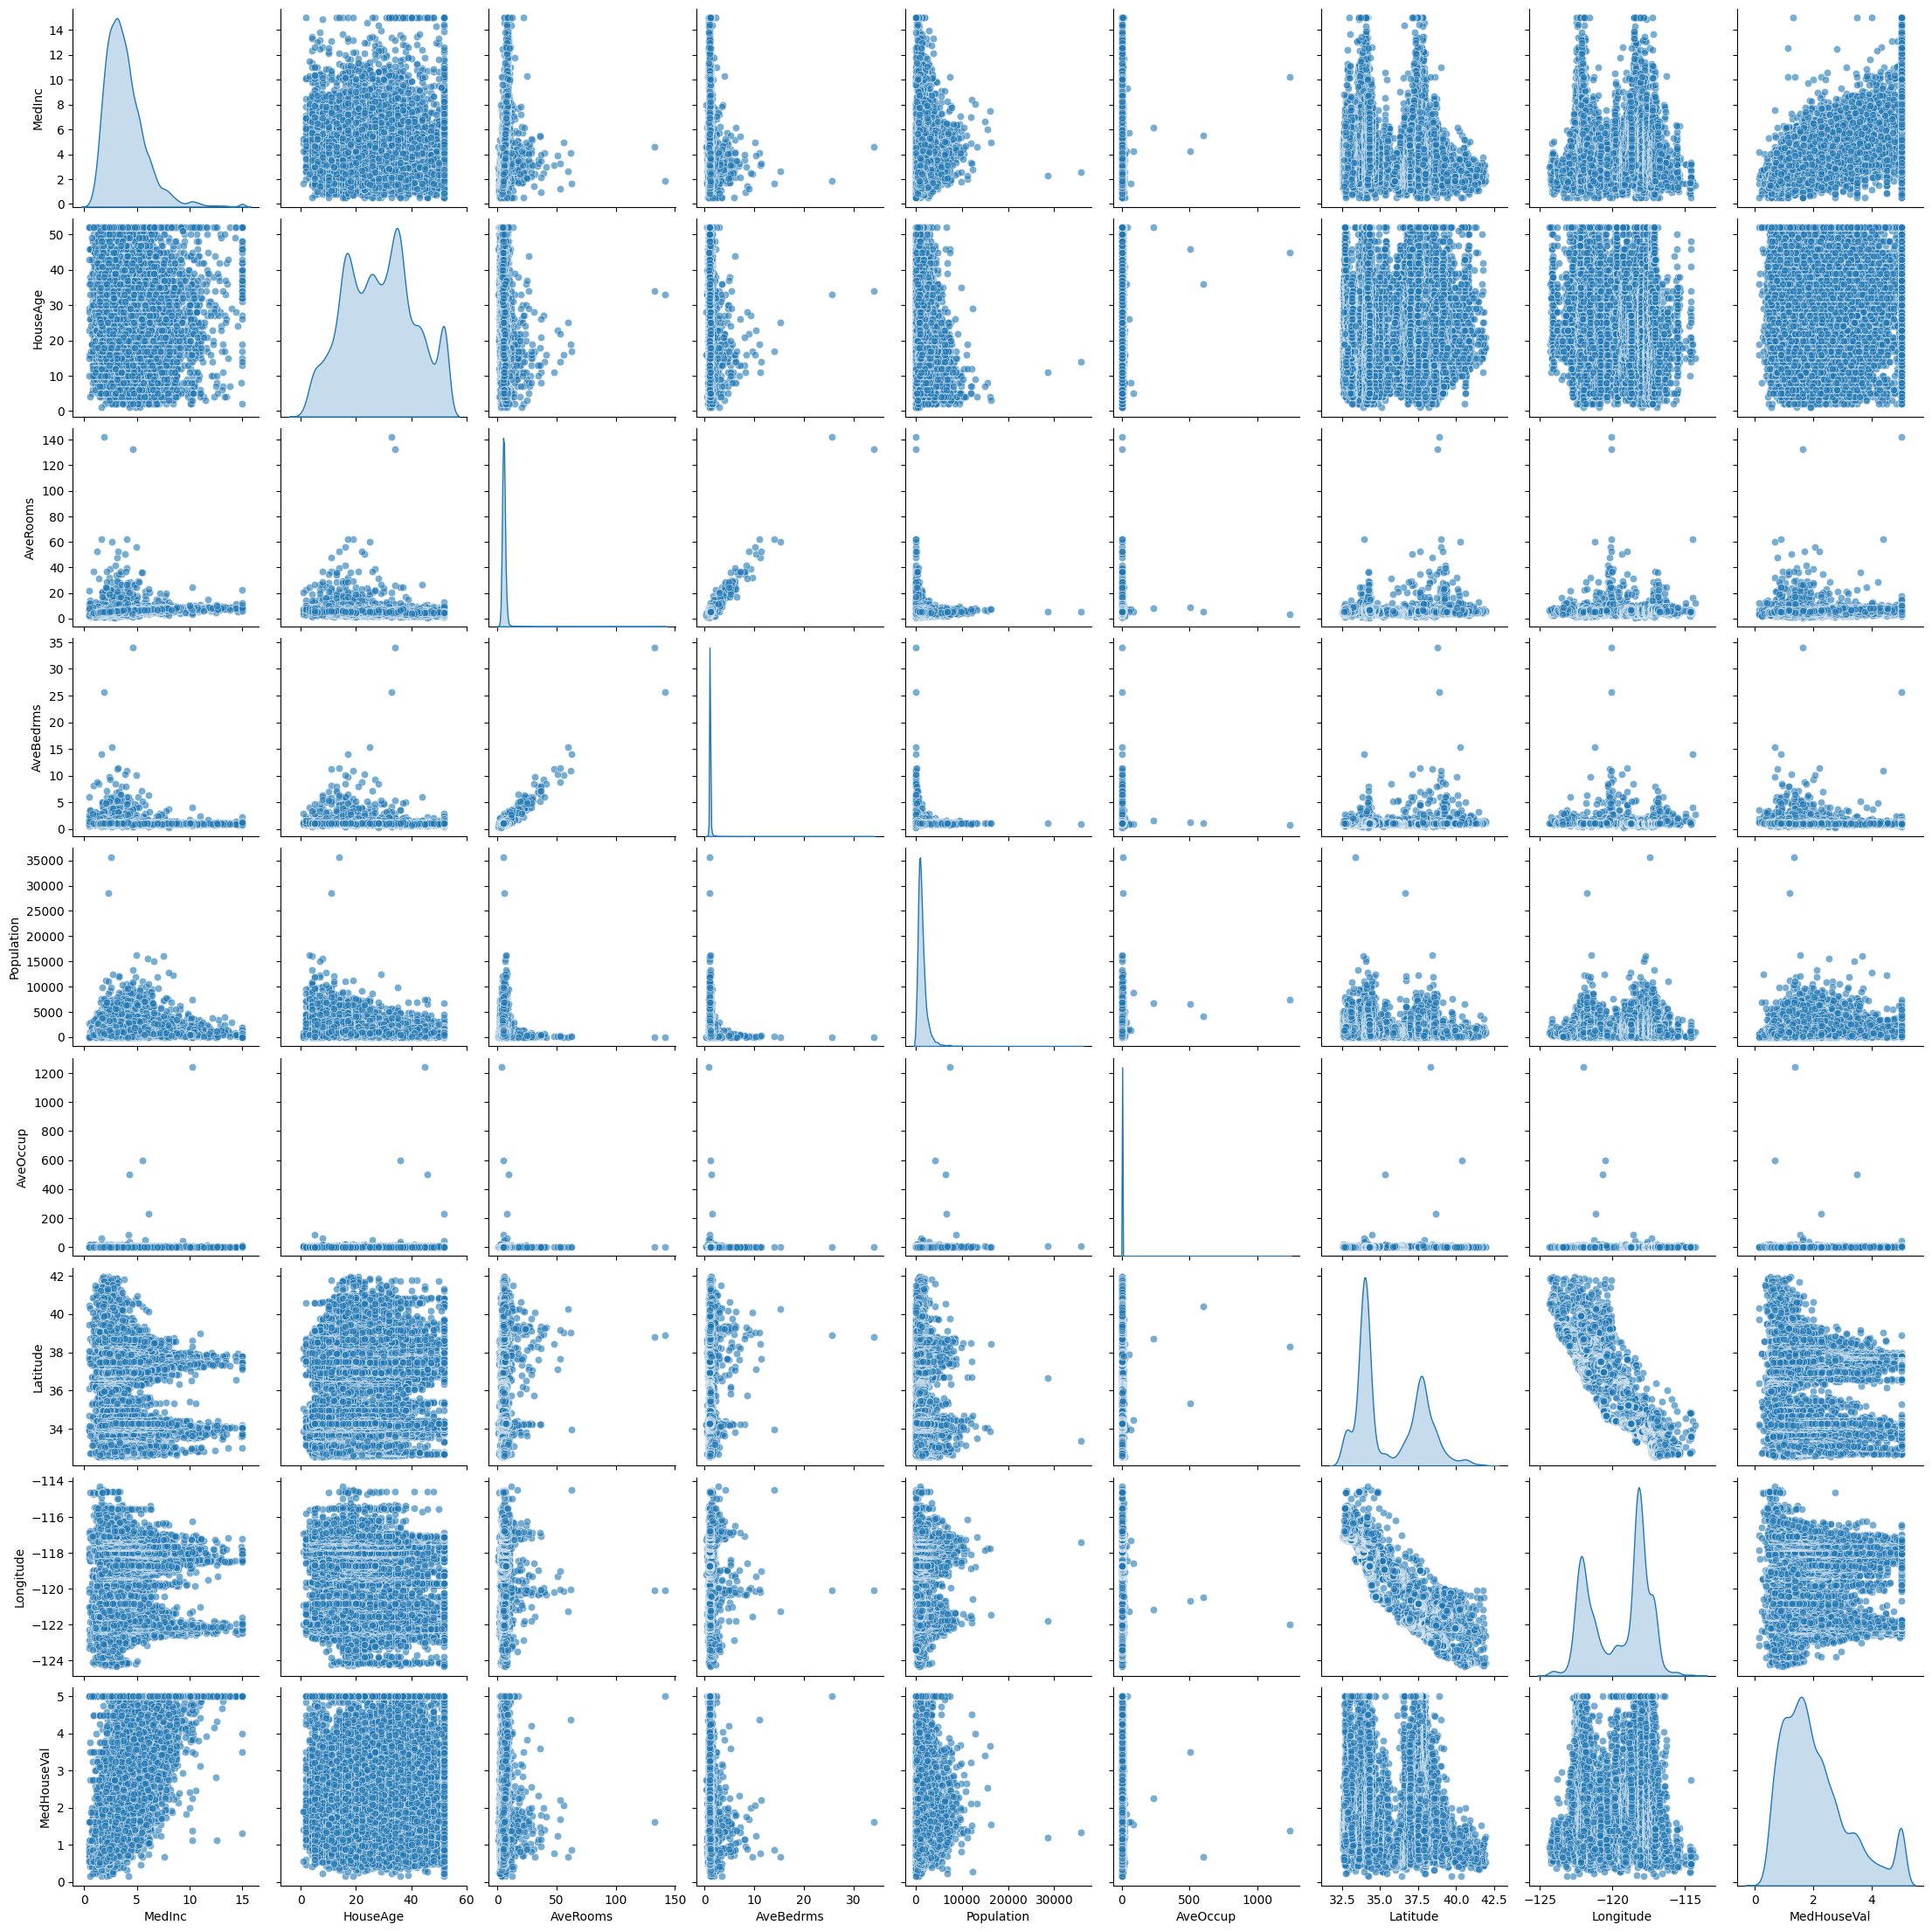

In [19]:
import seaborn as sns
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha':0.6})
plt.show()

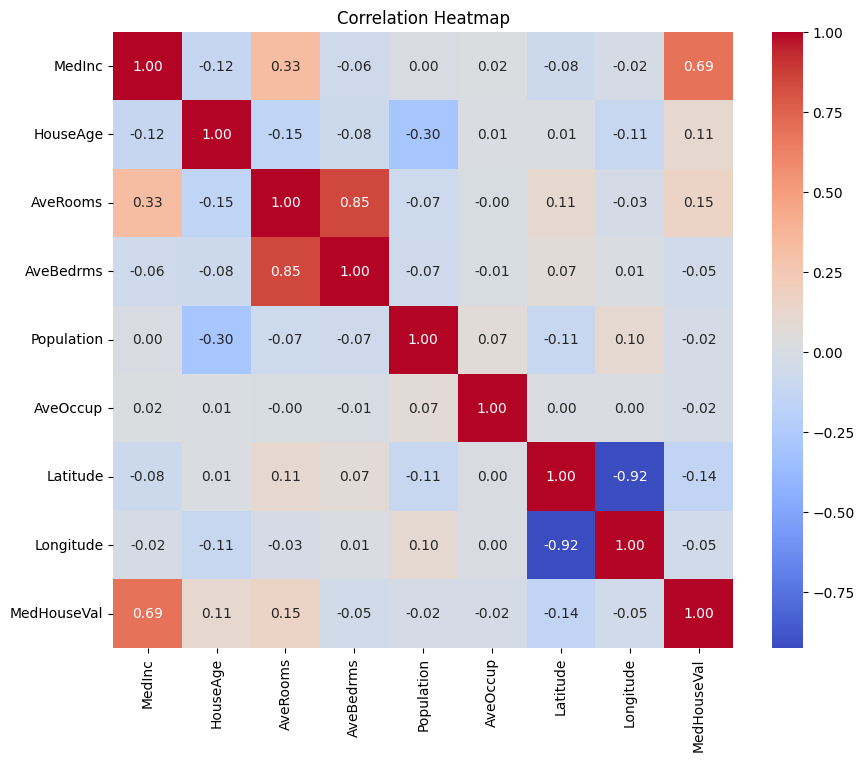

In [20]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
